In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [3]:
df = pd.read_csv("online_shoppers_intention.csv")
df.shape

(12330, 18)

In [4]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
# Redefining data type for some features
df.loc[:,['OperatingSystems', 'Browser', 'Region', 'TrafficType']] = df[['OperatingSystems', 'Browser', 'Region', 'TrafficType']].astype('int64').astype('object')

In [7]:
# Search for null values
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [8]:
# Search for duplicate values
df.duplicated().sum()

125

In [9]:
# We get rid of duplicated data
df.drop_duplicates(inplace=True, keep='first')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12205 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  int64  
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  int64  
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  int64  
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  Month                    12205 non-null  object 
 11  OperatingSystems         12205 non-null  object 
 12  Browser                  12205 non-null  object 
 13  Region                   12205 non-null  object 
 14  TrafficType              12

In [11]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000
mean,2.338878,81.646331,0.508726,34.825454,32.045637,1206.982457,0.020370,0.041466,5.949574,0.061942
std,3.330436,177.491845,1.275617,141.424807,44.593649,1919.601400,0.045255,0.046163,18.653671,0.199666
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,8.000000,193.000000,0.000000,0.014231,0.000000,0.000000
50%,1.000000,9.000000,0.000000,0.000000,18.000000,608.942857,0.002899,0.025000,0.000000,0.000000
75%,4.000000,94.700000,0.000000,0.000000,38.000000,1477.154762,0.016667,0.048529,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000


/Users/emmazhang/anaconda3/envs/ml-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/emmazhang/anaconda3/envs/ml-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/emmazhang/anaconda3/envs/ml-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/emmazhang/anaconda3/envs/ml-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na opti

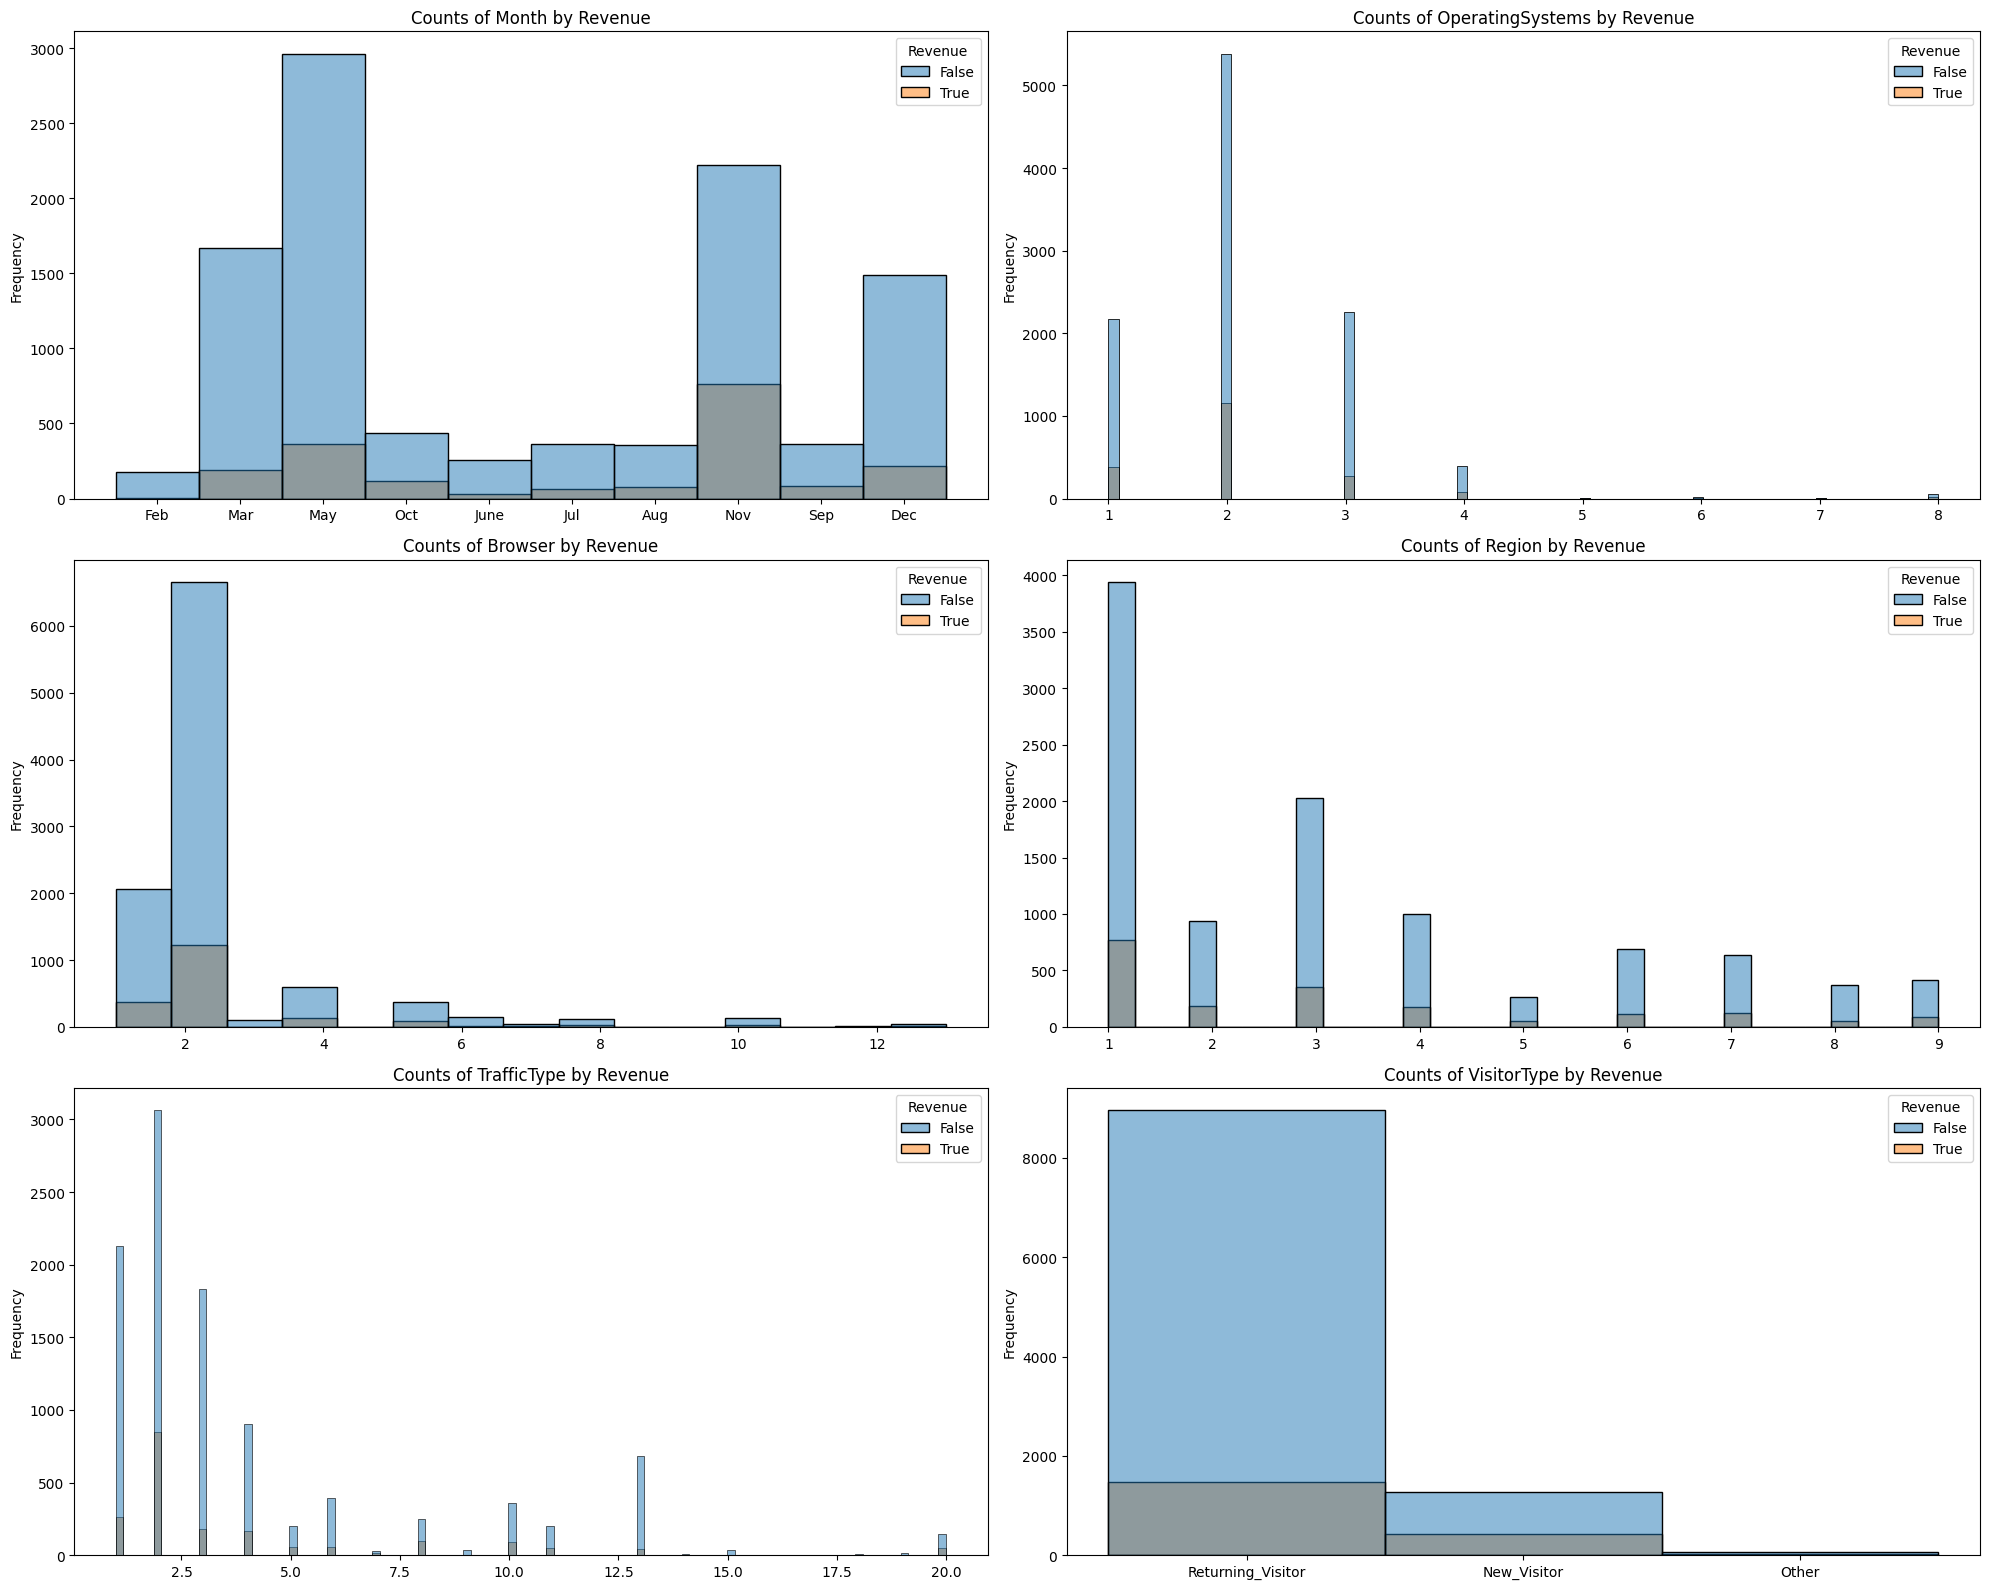

In [12]:
# Set up the matplotlib figure
fig, axes = plt.subplots(3, 2, figsize=(20, 16))

# Plot histograms for numerical features based on the value of the target variable 'Revenue'
for col, ax in zip(df.select_dtypes(include='object').columns, axes.flatten()):
    sns.histplot(data=df, x=df[col].values, hue="Revenue", ax=ax)
    ax.set_title(f'Counts of {col} by Revenue')
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()

/Users/emmazhang/anaconda3/envs/ml-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/emmazhang/anaconda3/envs/ml-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/emmazhang/anaconda3/envs/ml-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/emmazhang/anaconda3/envs/ml-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na opti

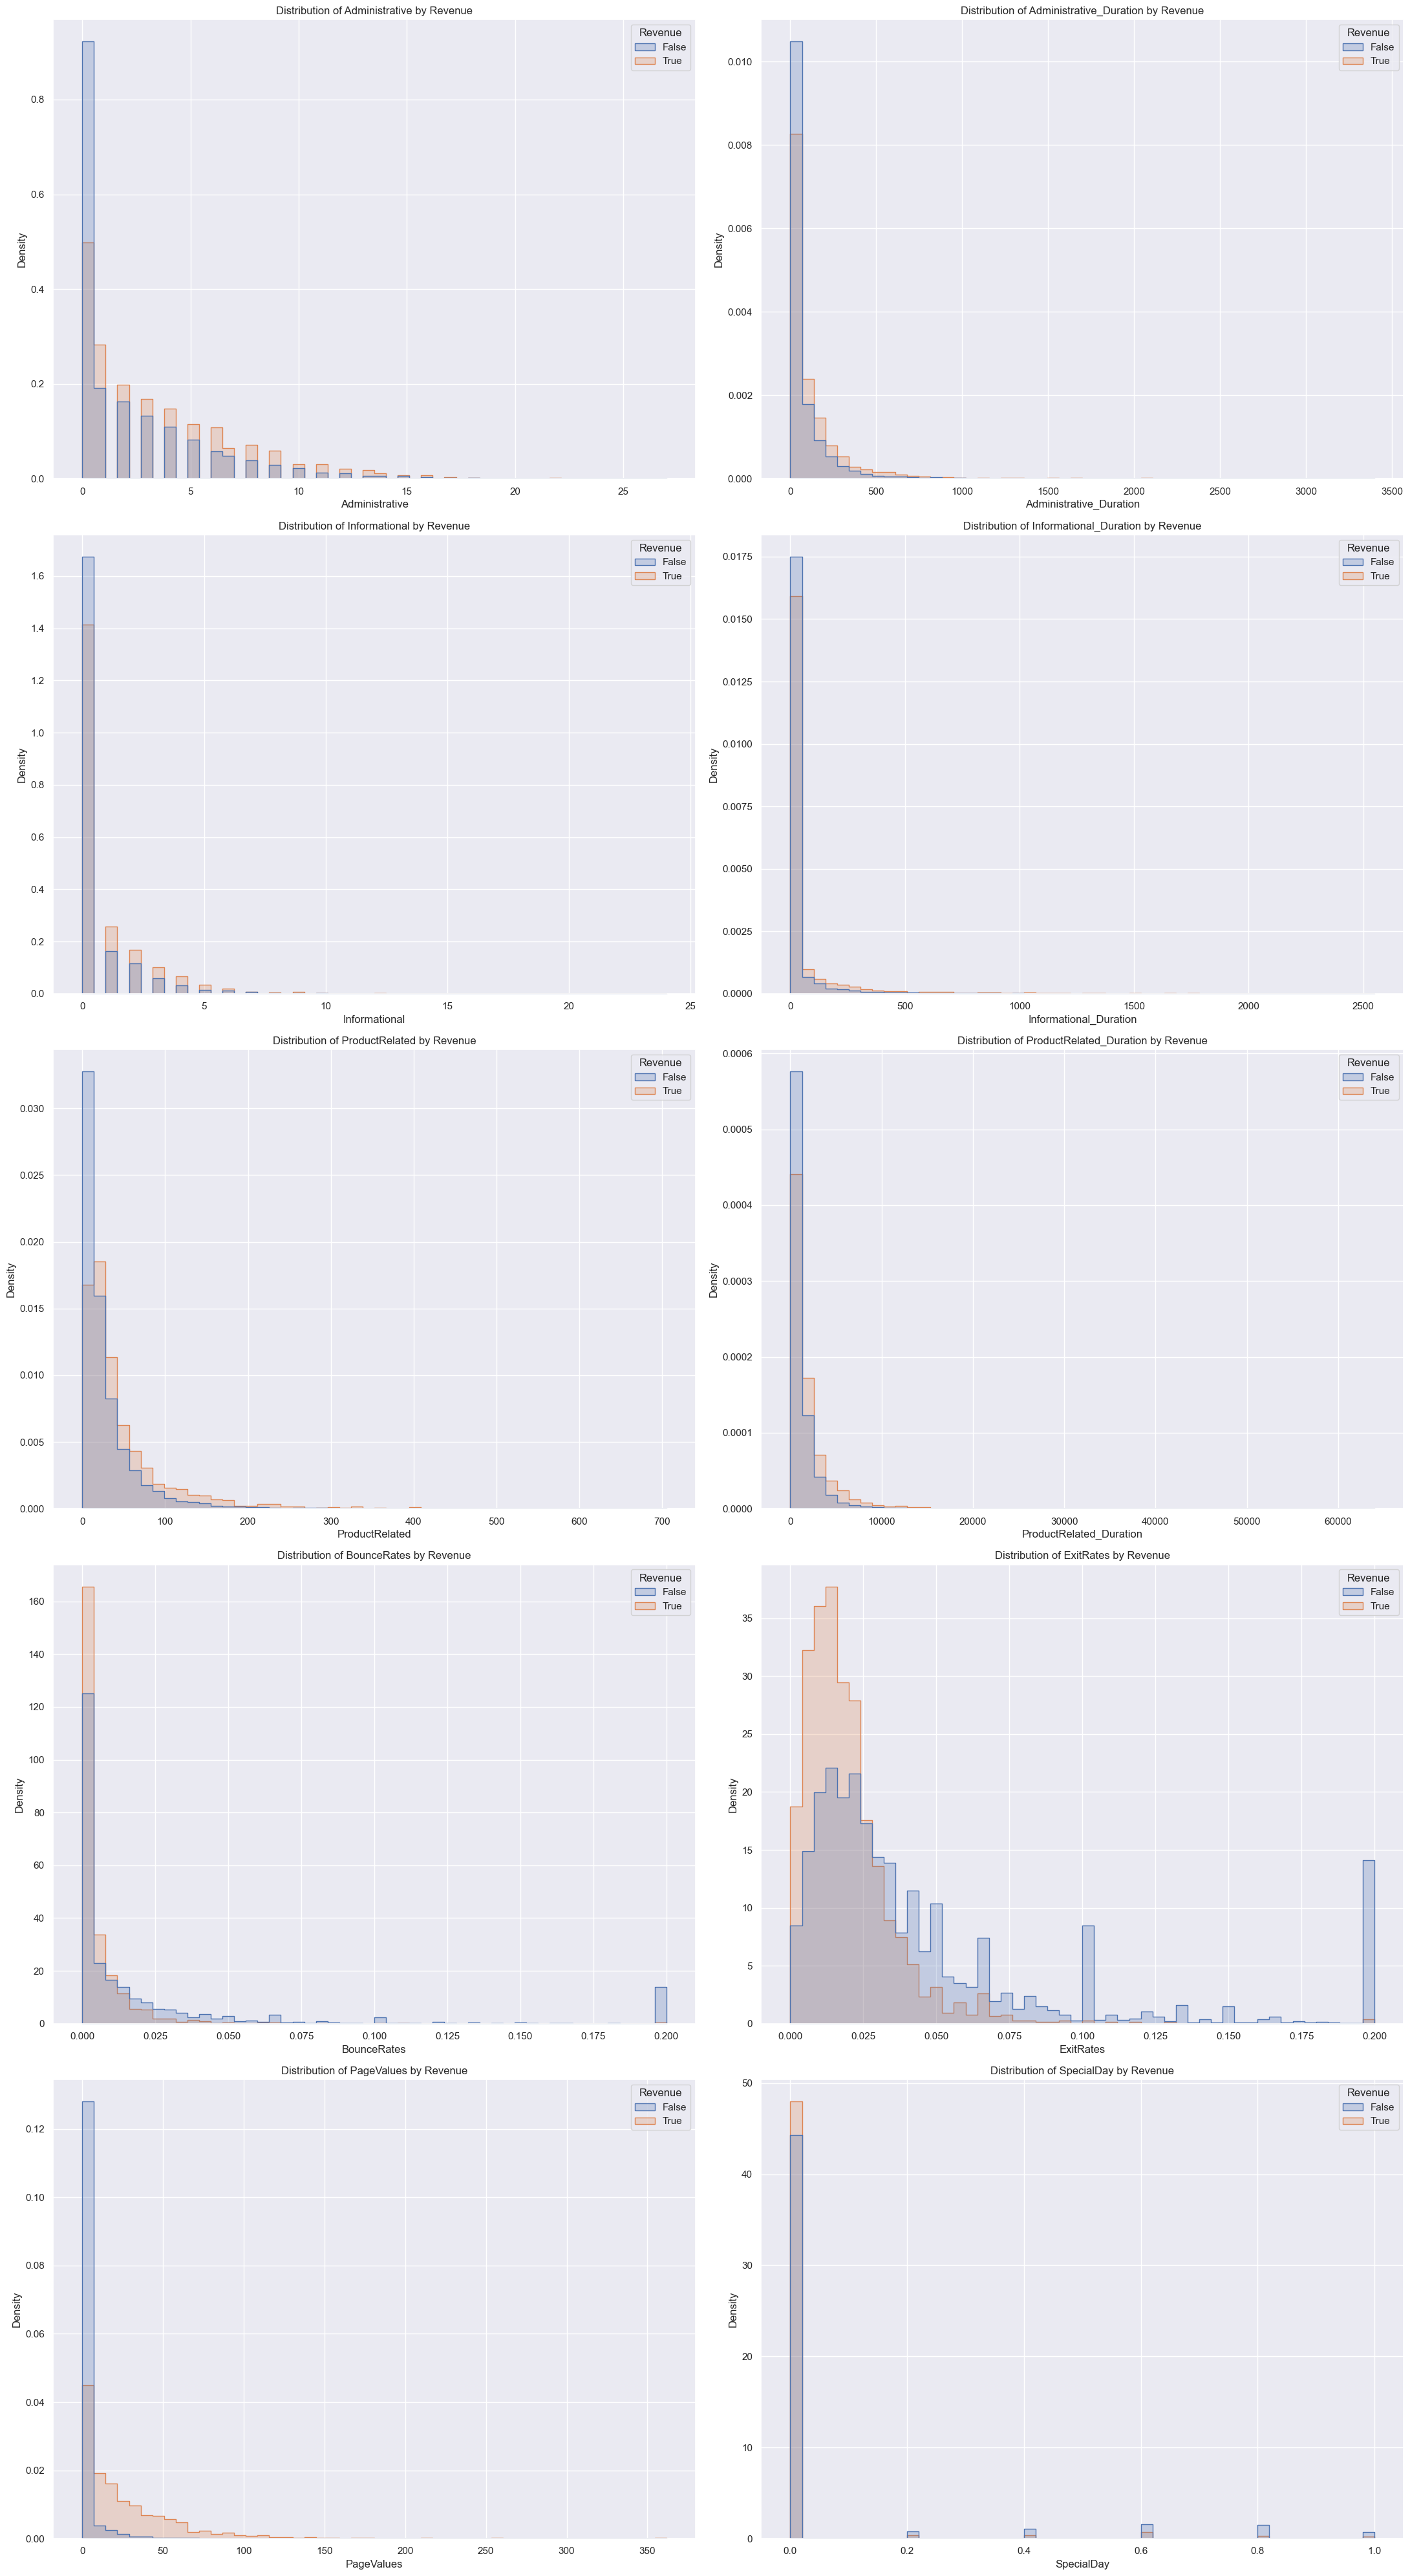

In [13]:
# Distributions of numerical features
sns.set_theme()
# Set up the matplotlib figure
fig, axes = plt.subplots(5, 2, figsize=(22, 40))

# Plot histograms for numerical features based on the value of the target variable 'Revenue'
for col, ax in zip(df.select_dtypes(include='number').columns, axes.flatten()):
    sns.histplot(data=df, x=col, hue="Revenue", element="step", stat="density", common_norm=False, bins=50, ax=ax)
    ax.set_title(f'Distribution of {col} by Revenue')

plt.tight_layout()
plt.show()

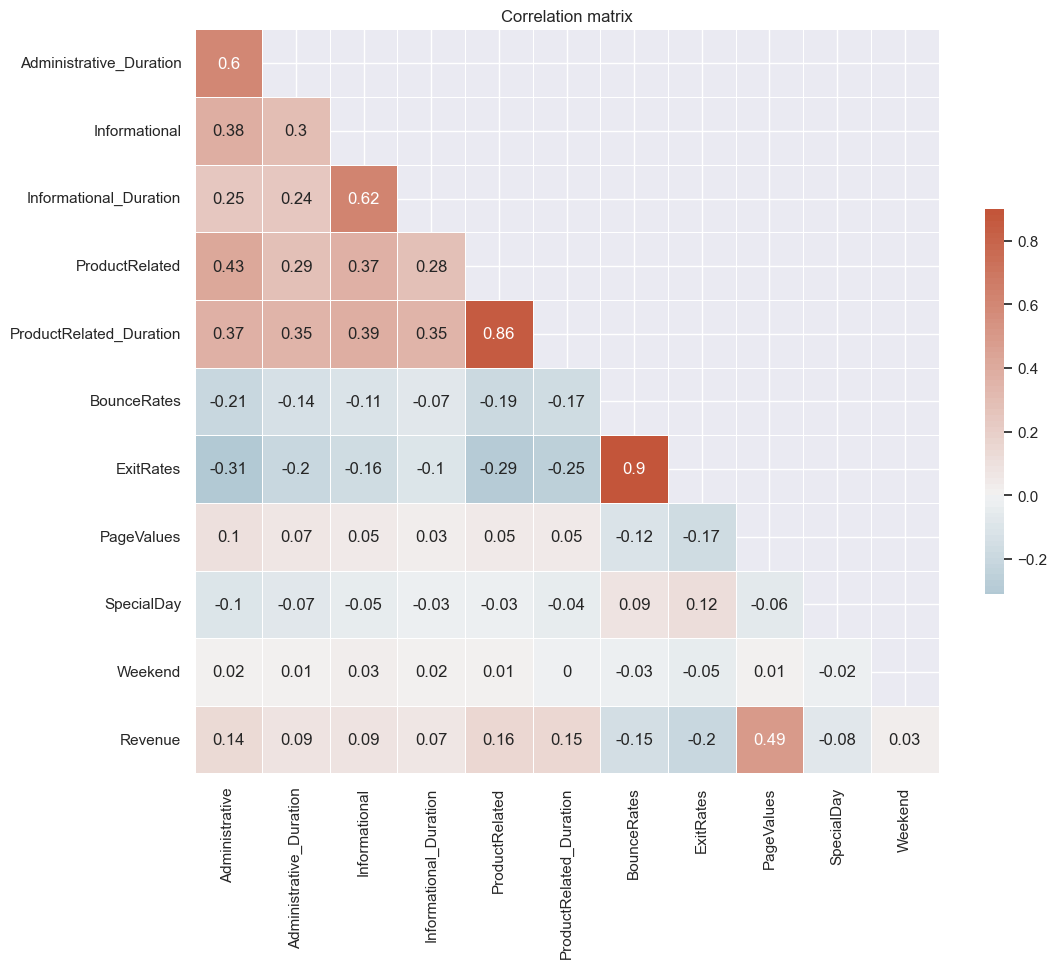

In [14]:
#use correlation matrix quantifies the degree and direction of the linear relationship between pairs of variables.

# Moving the Revenue label to the end for better visualisation
cols = [c for c in df if c != 'Revenue'] + ['Revenue']
df = df[cols]

# Correlational Matrix
df_corr_matrix = df[df.select_dtypes(include=['number', 'bool']).columns].corr().round(2)

# Plotting
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(df_corr_matrix))
cmap = sns.diverging_palette(230, 20, n=100)
ax = sns.heatmap(df_corr_matrix, mask=mask, annot=True, cmap=cmap, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_xlim(0,len(df_corr_matrix)-1)
ax.set_ylim(len(df_corr_matrix),1)
#ax.collections[0].set_clim(-1,1) 
plt.title('Correlation matrix')
plt.show()


In [15]:
# Drop the highly correlated features from the DataFrame
df = df.drop(['ProductRelated_Duration', 'ExitRates'], axis=1)


In [16]:
#Encoding the Month feature using cyclical encoding

# Assign a numerical value to each month
month_to_num = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5,
    'June': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 
    'Oct': 10, 'Nov': 11, 'Dec': 12
}
df['month_num'] = df['Month'].map(month_to_num)

# Encode with sine and cosine
df['month_sin'] = np.sin((df['month_num'] - 1) * (2. * np.pi / 12))
df['month_cos'] = np.cos((df['month_num'] - 1) * (2. * np.pi / 12))

df.drop(columns=['Month', 'month_num'], inplace=True)
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,BounceRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,month_sin,month_cos
0,0,0.0,0,0.0,1,0.20,0.0,0.0,1,1,1,1,Returning_Visitor,False,False,0.5,0.866025
1,0,0.0,0,0.0,2,0.00,0.0,0.0,2,2,1,2,Returning_Visitor,False,False,0.5,0.866025
2,0,0.0,0,0.0,1,0.20,0.0,0.0,4,1,9,3,Returning_Visitor,False,False,0.5,0.866025
3,0,0.0,0,0.0,2,0.05,0.0,0.0,3,2,2,4,Returning_Visitor,False,False,0.5,0.866025
4,0,0.0,0,0.0,10,0.02,0.0,0.0,3,3,1,4,Returning_Visitor,True,False,0.5,0.866025


In [17]:
# Encoding VisitorType feature

df['VisitorType_Returning_Visitor'] = 0
df['VisitorType_New_Visitor'] = 0
df['VisitorType_Other'] = 0

df.loc[df['VisitorType']=='Returning_Visitor', 'VisitorType_Returning_Visitor'] = 1
df.loc[df['VisitorType']=='New_Visitor', 'VisitorType_New_Visitor'] = 1
df.loc[df['VisitorType']=='Other', 'VisitorType_Other'] = 1

df.drop(columns=['VisitorType'], inplace=True)

In [18]:
# Encoding all the others categorical features with OneHotEncoding

encoder = OneHotEncoder(sparse_output=False)

for col in df.select_dtypes(include='object'):
    transformed = encoder.fit_transform(df[[col]])
    
    encoded_df = pd.DataFrame(transformed, columns=[f"{col}_{category}" for category in encoder.categories_[0]]) # Create a DataFrame from the encoded columns
   
    df = df.join(encoded_df.set_index(df.index)) # Add the new columns to the original DataFrame


df.drop(columns=df.select_dtypes(include='object').columns, inplace=True) # Drop the original categorical columns

In [19]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'BounceRates', 'PageValues',
       'SpecialDay', 'Weekend', 'Revenue', 'month_sin', 'month_cos',
       'VisitorType_Returning_Visitor', 'VisitorType_New_Visitor',
       'VisitorType_Other', 'OperatingSystems_1', 'OperatingSystems_2',
       'OperatingSystems_3', 'OperatingSystems_4', 'OperatingSystems_5',
       'OperatingSystems_6', 'OperatingSystems_7', 'OperatingSystems_8',
       'Browser_1', 'Browser_2', 'Browser_3', 'Browser_4', 'Browser_5',
       'Browser_6', 'Browser_7', 'Browser_8', 'Browser_9', 'Browser_10',
       'Browser_11', 'Browser_12', 'Browser_13', 'Region_1', 'Region_2',
       'Region_3', 'Region_4', 'Region_5', 'Region_6', 'Region_7', 'Region_8',
       'Region_9', 'TrafficType_1', 'TrafficType_2', 'TrafficType_3',
       'TrafficType_4', 'TrafficType_5', 'TrafficType_6', 'TrafficType_7',
       'TrafficType_8', 'TrafficType_9', 'TrafficType_1

In [20]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,BounceRates,PageValues,SpecialDay,Weekend,Revenue,...,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20
0,0,0.0,0,0.0,1,0.20,0.0,0.0,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0,0.0,2,0.00,0.0,0.0,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0,0.0,1,0.20,0.0,0.0,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0,0.0,2,0.05,0.0,0.0,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0,0.0,10,0.02,0.0,0.0,True,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
from sklearn.preprocessing import StandardScaler

# Selecting numerical features for scaling
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# Initializing the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and then transform it
df[numerical_features] = scaler.fit_transform(df[numerical_features])

df.head()



,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,BounceRates,PageValues,SpecialDay,Weekend,Revenue,...,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20
0,-0.702302,-0.460019,-0.398824,-0.246257,-0.696218,3.969402,-0.318962,-0.31024,False,False,...,-0.143721,-0.009052,-0.251856,-0.032654,-0.055143,-0.01568,-0.009052,-0.028636,-0.037347,-0.126757
1,-0.702302,-0.460019,-0.398824,-0.246257,-0.673793,-0.450137,-0.318962,-0.31024,False,False,...,-0.143721,-0.009052,-0.251856,-0.032654,-0.055143,-0.01568,-0.009052,-0.028636,-0.037347,-0.126757
2,-0.702302,-0.460019,-0.398824,-0.246257,-0.696218,3.969402,-0.318962,-0.31024,False,False,...,-0.143721,-0.009052,-0.251856,-0.032654,-0.055143,-0.01568,-0.009052,-0.028636,-0.037347,-0.126757
3,-0.702302,-0.460019,-0.398824,-0.246257,-0.673793,0.654748,-0.318962,-0.31024,False,False,...,-0.143721,-0.009052,-0.251856,-0.032654,-0.055143,-0.01568,-0.009052,-0.028636,-0.037347,-0.126757
4,-0.702302,-0.460019,-0.398824,-0.246257,-0.494387,-0.008183,-0.318962,-0.31024,True,False,...,-0.143721,-0.009052,-0.251856,-0.032654,-0.055143,-0.01568,-0.009052,-0.028636,-0.037347,-0.126757


In [22]:
y = df['Revenue'] # Labels
X = df[df.columns.difference(['Revenue']).to_list()] # Features

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.ensemble import RandomForestClassifier
# Create a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the data
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Sort the feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]

# Display the feature importances
for index in sorted_indices:
    print(f"{X.columns[index]}: {importances[index]}")

PageValues: 0.3660873055131356
ProductRelated: 0.10379130440096919
BounceRates: 0.07039863471765831
Administrative_Duration: 0.06639062749325743
Administrative: 0.05246460499866025
month_sin: 0.032849060860240364
Informational_Duration: 0.03142624576732417
month_cos: 0.028834730512171156
Informational: 0.021195714872729452
Weekend: 0.01425499268876355
Region_1: 0.013906620697772917
TrafficType_2: 0.011753891276973088
Region_3: 0.010898160079536996
Browser_2: 0.00979142231276525
VisitorType_New_Visitor: 0.00972946169552087
OperatingSystems_2: 0.009525040734438855
VisitorType_Returning_Visitor: 0.008575254911785332
Region_4: 0.007972662128534567
TrafficType_1: 0.007813789934153062
OperatingSystems_3: 0.007801960862387981
TrafficType_3: 0.007384221703893543
OperatingSystems_1: 0.007111889805733924
Region_2: 0.007027460538286374
Browser_1: 0.0065770474880479405
Browser_4: 0.00623553082834677
Region_7: 0.0060278302222738
Region_6: 0.00560334139002787
SpecialDay: 0.005443506679536746
Region_

In [25]:
# exclude features that contribute less than 0.01
# Create a DataFrame of the features and their importance scores
features_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Filter out features with importance less than 0.01
selected_features_df = features_importance[features_importance['Importance'] >= 0.01]

# Display the features to exclude (just for reference)
features_to_exclude = features_importance[features_importance['Importance'] < 0.01]
print("Features to exclude:")
print(features_to_exclude)

# Update the X_train and X_test sets to include only the selected features
selected_features = selected_features_df['Feature'].tolist()
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# X_train_selected and X_test_selected now contain only the features with importance >= 0.01
X_train_selected.head()

Features to exclude:
                          Feature    Importance
3                       Browser_1  6.577047e-03
4                      Browser_10  1.865354e-03
5                      Browser_11  8.176709e-05
6                      Browser_12  8.232652e-04
7                      Browser_13  4.467022e-04
8                       Browser_2  9.791422e-03
9                       Browser_3  6.661675e-04
10                      Browser_4  6.235531e-03
11                      Browser_5  3.565975e-03
12                      Browser_6  1.681745e-03
13                      Browser_7  8.796513e-04
14                      Browser_8  1.234422e-03
15                      Browser_9  5.903329e-07
18             OperatingSystems_1  7.111890e-03
19             OperatingSystems_2  9.525041e-03
20             OperatingSystems_3  7.801961e-03
21             OperatingSystems_4  4.096633e-03
22             OperatingSystems_5  6.933273e-05
23             OperatingSystems_6  3.081216e-04
24             Oper

,Administrative,Administrative_Duration,BounceRates,Informational,Informational_Duration,PageValues,ProductRelated,Region_1,Region_3,TrafficType_2,Weekend,month_cos,month_sin
5304,-0.702302,-0.460019,-0.450137,-0.398824,-0.246257,-0.318962,-0.584090,-0.793277,2.032316,-0.686692,False,-0.980272,1.078701
9686,-0.702302,-0.460019,-0.450137,-0.398824,-0.246257,1.718288,1.232387,1.260594,-0.492050,1.456257,False,0.677883,-1.107207
11085,1.399610,0.633503,-0.450137,0.385143,0.257565,-0.318962,-0.382259,1.260594,-0.492050,1.456257,False,1.284809,-0.645270
7515,1.399610,0.871927,0.867971,-0.398824,-0.246257,-0.318962,-0.404685,-0.793277,-0.492050,-0.686692,False,-1.587199,0.616764
6717,-0.702302,-0.460019,0.391680,-0.398824,-0.246257,-0.318962,-0.561664,-0.793277,2.032316,-0.686692,False,0.677883,-1.107207


In [26]:
X_train_selected.describe()

,Administrative,Administrative_Duration,BounceRates,Informational,Informational_Duration,PageValues,ProductRelated,Region_1,Region_3,TrafficType_2,month_cos,month_sin
count,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000,9764.000000
mean,-0.000424,0.000900,-0.001419,0.005765,-0.001986,0.007514,0.001241,0.004375,0.005119,0.003555,0.002000,-0.006222
std,1.000963,0.993474,0.995036,1.013800,0.972687,1.020073,1.002607,1.001064,1.003973,1.001412,0.999268,1.000398
min,-0.702302,-0.460019,-0.450137,-0.398824,-0.246257,-0.318962,-0.718644,-0.793277,-0.492050,-0.686692,-1.809350,-1.276287
25%,-0.702302,-0.460019,-0.450137,-0.398824,-0.246257,-0.318962,-0.539239,-0.793277,-0.492050,-0.686692,-0.980272,-1.107207
50%,-0.402029,-0.403676,-0.385382,-0.398824,-0.246257,-0.318962,-0.314982,-0.793277,-0.492050,-0.686692,0.677883,-0.645270
75%,0.498791,0.069604,-0.081842,-0.398824,-0.246257,-0.318962,0.133530,1.260594,-0.492050,1.456257,0.677883,1.078701
max,7.405076,14.868073,3.969402,18.416377,15.678287,19.075534,15.091430,1.260594,2.032316,1.456257,1.284809,1.078701


<h2>PCA</h2>

In [27]:
#Step1: Analysing the data to be fit for PCA

In [28]:
X_train_selected.var()

Administrative             1.001927
Administrative_Duration    0.986991
BounceRates                0.990097
Informational              1.027790
Informational_Duration     0.946121
PageValues                 1.040549
ProductRelated             1.005221
Region_1                   1.002128
Region_3                   1.007962
TrafficType_2              1.002826
Weekend                    0.178729
month_cos                  0.998536
month_sin                  1.000796
dtype: float64

In [29]:
distinct_values = X_train_selected['Weekend'].unique()
print(distinct_values)

[False  True]


In [30]:
#Step3
#Converting true and false values to 1 and 0 for train set
X_train_selected_copy = X_train_selected.copy()
X_train_selected_copy['Weekend'] = X_train_selected_copy['Weekend'].astype(int)
distinct_values = X_train_selected_copy['Weekend'].unique()
print(distinct_values)

[0 1]


In [31]:
# Reshape the column to a 2D array as StandardScaler expects
scaled_column = scaler.fit_transform(X_train_selected_copy[['Weekend']])
X_train_selected_copy['Weekend'] = scaled_column

In [32]:
X_train_selected_copy.head()

,Administrative,Administrative_Duration,BounceRates,Informational,Informational_Duration,PageValues,ProductRelated,Region_1,Region_3,TrafficType_2,Weekend,month_cos,month_sin
5304,-0.702302,-0.460019,-0.450137,-0.398824,-0.246257,-0.318962,-0.584090,-0.793277,2.032316,-0.686692,-0.551161,-0.980272,1.078701
9686,-0.702302,-0.460019,-0.450137,-0.398824,-0.246257,1.718288,1.232387,1.260594,-0.492050,1.456257,-0.551161,0.677883,-1.107207
11085,1.399610,0.633503,-0.450137,0.385143,0.257565,-0.318962,-0.382259,1.260594,-0.492050,1.456257,-0.551161,1.284809,-0.645270
7515,1.399610,0.871927,0.867971,-0.398824,-0.246257,-0.318962,-0.404685,-0.793277,-0.492050,-0.686692,-0.551161,-1.587199,0.616764
6717,-0.702302,-0.460019,0.391680,-0.398824,-0.246257,-0.318962,-0.561664,-0.793277,2.032316,-0.686692,-0.551161,0.677883,-1.107207


In [33]:
#Converting true and false values to 1 and 0 for train set
X_test_selected_copy = X_test_selected.copy()
X_test_selected_copy['Weekend'] = X_test_selected_copy['Weekend'].astype(int)
distinct_values = X_test_selected_copy['Weekend'].unique()
print(distinct_values)

[0 1]


In [34]:
# Reshape the column to a 2D array as StandardScaler expects
scaled_column = scaler.fit_transform(X_test_selected_copy[['Weekend']])
X_test_selected_copy['Weekend'] = scaled_column

In [35]:
#Step 4:Calculating the covariance matrix for train dataset
covar_matrix_train = np.cov(X_train_selected_copy,rowvar=False)
print("\nCovariance matrix for train:")
print(covar_matrix_train)


Covariance matrix for train:
[[ 1.00192670e+00  6.04988265e-01 -2.11014794e-01  3.86164185e-01
   2.57235258e-01  9.29546559e-02  4.28942310e-01 -3.51626370e-03
   1.65417022e-02  1.11892207e-01  2.29371714e-02 -1.30138423e-02
  -1.26089286e-01]
 [ 6.04988265e-01  9.86990988e-01 -1.35155321e-01  3.08298240e-01
   2.16843510e-01  6.66640945e-02  2.82489201e-01 -1.11452445e-03
   5.83936707e-03  8.39631293e-02  1.18695598e-02 -4.93804032e-03
  -7.52097811e-02]
 [-2.11014794e-01 -1.35155321e-01  9.90096711e-01 -1.09707316e-01
  -6.76777709e-02 -1.17970458e-01 -1.92616966e-01 -1.50734523e-02
  -1.33711331e-04 -1.82800738e-01 -3.88198899e-02 -4.55605753e-02
   7.03450574e-02]
 [ 3.86164185e-01  3.08298240e-01 -1.09707316e-01  1.02779007e+00
   6.22831644e-01  4.22395610e-02  3.86995520e-01  3.15051353e-02
   3.20106847e-04  1.29562952e-01  3.83545683e-02  1.95987653e-02
  -6.32471696e-02]
 [ 2.57235258e-01  2.16843510e-01 -6.76777709e-02  6.22831644e-01
   9.46120880e-01  2.50465994e-02  2

In [36]:
#Step5 - Calculating the eigen values and eigen vectors

In [37]:
eigenvalues, eigenvectors = np.linalg.eig(covar_matrix_train)

print("\nEigen values:")
print(eigenvalues)
print("\nEigen vectors:")
print(eigenvectors)


Eigen values:
[2.6905744  1.49970783 1.39055274 0.34427249 0.36767202 1.13628474
 1.02396717 0.98369589 0.92039942 0.80113692 0.69398677 0.6077322
 0.5510638 ]

Eigen vectors:
[[ 4.61349822e-01  1.22500457e-01 -8.94861091e-03  3.83793193e-01
  -6.53019880e-01 -1.96047286e-01  2.92232784e-01 -2.12157961e-01
  -4.92089267e-02 -1.60022624e-01  3.58484088e-02 -1.30269572e-02
   2.93539120e-03]
 [ 3.96985726e-01  1.39687956e-01  6.24060250e-03 -2.44462408e-01
   5.67724017e-01 -1.87585226e-01  3.44640519e-01 -2.40045847e-01
  -9.00286697e-02 -3.83357371e-01  2.65266617e-01 -5.56141093e-02
  -2.57600211e-02]
 [-2.15515732e-01  1.38458266e-01  7.04796610e-02  3.12677271e-02
  -4.31098631e-02  4.57117541e-01  1.51262556e-01  2.79879897e-02
  -5.07689951e-01 -5.16730913e-01 -3.95474000e-01 -3.75104062e-02
   1.06733271e-01]
 [ 4.52032008e-01  1.60327647e-01  9.11383177e-02 -6.55361405e-01
  -3.17256431e-01  3.33397030e-01 -2.49908650e-01  2.05659472e-01
  -4.14080169e-02  3.96455117e-02  1.035

In [38]:
#Step6 - Sorting eigenvalues and corresponding eigen vectors
sorted_indices = np.argsort(eigenvalues)[::-1]

In [39]:
#np.argsort(eigenvalues): This part returns an array of indices 
#that would sort the eigenvalues in ascending order. 
#The result is an array of indices, where each index corresponds 
#to the position of the corresponding eigenvalue 
#in the sorted order.
#[::-1]: This part reverses the array of indices. As a result, 
#the indices are now in descending order,
#corresponding to the eigenvalues sorted in descending order.

In [40]:
eigenvalues = eigenvalues[sorted_indices]
#sorting eigen values in the order of descending values
eigenvectors = eigenvectors[:, sorted_indices]
#sorting the eigenvectors column wise to match the eigen values' order

In [41]:
print(eigenvalues)
print(eigenvectors)

[2.6905744  1.49970783 1.39055274 1.13628474 1.02396717 0.98369589
 0.92039942 0.80113692 0.69398677 0.6077322  0.5510638  0.36767202
 0.34427249]
[[ 4.61349822e-01  1.22500457e-01 -8.94861091e-03 -1.96047286e-01
   2.92232784e-01 -2.12157961e-01 -4.92089267e-02 -1.60022624e-01
   3.58484088e-02 -1.30269572e-02  2.93539120e-03 -6.53019880e-01
   3.83793193e-01]
 [ 3.96985726e-01  1.39687956e-01  6.24060250e-03 -1.87585226e-01
   3.44640519e-01 -2.40045847e-01 -9.00286697e-02 -3.83357371e-01
   2.65266617e-01 -5.56141093e-02 -2.57600211e-02  5.67724017e-01
  -2.44462408e-01]
 [-2.15515732e-01  1.38458266e-01  7.04796610e-02  4.57117541e-01
   1.51262556e-01  2.79879897e-02 -5.07689951e-01 -5.16730913e-01
  -3.95474000e-01 -3.75104062e-02  1.06733271e-01 -4.31098631e-02
   3.12677271e-02]
 [ 4.52032008e-01  1.60327647e-01  9.11383177e-02  3.33397030e-01
  -2.49908650e-01  2.05659472e-01 -4.14080169e-02  3.96455117e-02
   1.03505866e-01  2.33541334e-02 -3.25069383e-02 -3.17256431e-01
  -6

In [42]:
#Step7 - Choosing the number of principle components = 11

In [43]:
selected_eigenvectors = eigenvectors[:,:11]
#selecting 11 columns and all rows of the eigenvectors
print(selected_eigenvectors)

[[ 4.61349822e-01  1.22500457e-01 -8.94861091e-03 -1.96047286e-01
   2.92232784e-01 -2.12157961e-01 -4.92089267e-02 -1.60022624e-01
   3.58484088e-02 -1.30269572e-02  2.93539120e-03]
 [ 3.96985726e-01  1.39687956e-01  6.24060250e-03 -1.87585226e-01
   3.44640519e-01 -2.40045847e-01 -9.00286697e-02 -3.83357371e-01
   2.65266617e-01 -5.56141093e-02 -2.57600211e-02]
 [-2.15515732e-01  1.38458266e-01  7.04796610e-02  4.57117541e-01
   1.51262556e-01  2.79879897e-02 -5.07689951e-01 -5.16730913e-01
  -3.95474000e-01 -3.75104062e-02  1.06733271e-01]
 [ 4.52032008e-01  1.60327647e-01  9.11383177e-02  3.33397030e-01
  -2.49908650e-01  2.05659472e-01 -4.14080169e-02  3.96455117e-02
   1.03505866e-01  2.33541334e-02 -3.25069383e-02]
 [ 3.66587554e-01  1.53330399e-01  8.29979595e-02  3.87448842e-01
  -3.04412703e-01  2.69869961e-01 -4.62580225e-02  3.18754661e-02
   2.09312983e-01  4.28602948e-02 -1.39951062e-01]
 [ 1.05022528e-01 -1.34066419e-01 -5.45489028e-02 -5.76334383e-01
  -2.48949619e-01  

In [44]:
#Step8 - Project data onto principle components

In [45]:
#TRAIN Dataset
#calculating the dot between the standardized data and selected eigen vectors
reduced_data_train = np.dot(X_train_selected_copy, selected_eigenvectors)


#coverting the resulting matrix to a dataframe
reduced_data_train_df = pd.DataFrame(reduced_data_train, columns=['prncpl_comp1','prncpl_comp2','prncpl_comp3','prncpl_comp4',
                                                            'prncpl_comp5','prncpl_comp6','prncpl_comp7','prncpl_comp8',
                                                            'prncpl_comp9','prncpl_comp10', 'prncpl_comp11'])

In [46]:
#TEST Dataset
#calculating the dot between the standardized data and selected eigen vectors
reduced_data_test = np.dot(X_test_selected_copy, selected_eigenvectors)


#coverting the resulting matrix to a dataframe
reduced_data_test_df = pd.DataFrame(reduced_data_test, columns=['prncpl_comp1','prncpl_comp2','prncpl_comp3','prncpl_comp4',
                                                            'prncpl_comp5','prncpl_comp6','prncpl_comp7','prncpl_comp8',
                                                            'prncpl_comp9','prncpl_comp10', 'prncpl_comp11'])

In [47]:
print('\nReduced Dataset:')
print(reduced_data_train_df)


Reduced Dataset:
      prncpl_comp1  prncpl_comp2  prncpl_comp3  prncpl_comp4  prncpl_comp5  \
0        -1.376922      1.812919     -1.409136     -0.265751     -0.068378   
1         0.518812     -2.423793      0.447291     -0.999223     -0.277843   
2         1.564199     -1.687780      0.600126      0.094329      0.644471   
3        -0.059328      1.965322      0.383803     -0.575191      1.290840   
4        -1.056108     -0.224198     -2.156897      0.965271      0.704252   
...            ...           ...           ...           ...           ...   
9759     -1.043441     -0.824513     -0.478629      0.751432      0.709778   
9760      0.631924      0.271021      1.298369     -0.849872     -1.655255   
9761      1.652278      0.380106      0.034121      1.743051     -0.351636   
9762      0.059853     -0.409831     -0.428639     -0.497576     -1.541421   
9763      3.438905      0.206600     -1.869714      3.138350     -3.580043   

      prncpl_comp6  prncpl_comp7  prncpl_comp

In [48]:
total_variance = sum(eigenvalues)
first_eleven_variance = sum(eigenvalues[:11])
proportion_pca = first_eleven_variance / total_variance * 100
print(proportion_pca)

94.5281532860045


# Classification

### Decision Tree

In [50]:
#use tree decision model to predict
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [51]:
# Create a decision tree classifier using information gain and entropy
clf = DecisionTreeClassifier(criterion='entropy')

In [52]:
# Train the classifier on the training data
clf.fit(reduced_data_train_df, y_train)

DecisionTreeClassifier(criterion='entropy')

In [53]:
# Plot the decision tree
#plt.figure(figsize=(200, 100))
#plot_tree(clf, max_depth=10, filled=True)

In [54]:
#evaluate the classifier on the testing data
accuracy = clf.score(reduced_data_test_df, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8484227775501844


In [55]:
from sklearn.metrics import classification_report
y_pred = clf.predict(reduced_data_test_df)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.91      0.92      0.91      2079
        True       0.49      0.46      0.48       362

    accuracy                           0.85      2441
   macro avg       0.70      0.69      0.69      2441
weighted avg       0.85      0.85      0.85      2441



### SVM

In [56]:
#using SVM to predict
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [57]:
# use default RBF SVM
# c=1, gamma='scale'
# Initialize the SVM classifier
svc=SVC(kernel='rbf')

# Fit the model on the training data
svc.fit(reduced_data_train_df, y_train)

# Predict on the testing data
y_pred=svc.predict(reduced_data_test_df)

print('Accuracy Score: ')
print(metrics.accuracy_score(y_test, y_pred))

Accuracy Score: 
0.8918476034412126


In [58]:
#use classification report to assess the model’s performance 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.91      0.96      0.94      2079
        True       0.70      0.48      0.57       362

    accuracy                           0.89      2441
   macro avg       0.81      0.72      0.75      2441
weighted avg       0.88      0.89      0.88      2441



In [65]:
# Define the parameter grid: values to try for the hyperparameters
# find the best combination of C and gamma through cross-validation
param_grid = {
    #typical C range 0.1 to 1000
    'C': [0.1, 1, 10, 100, 1000],     
    'gamma': [10, 1, 0.1, 0.01, 0.001]
}

# Initialize the SVM classifier
svc = SVC(kernel='rbf')

# Initialize the GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, verbose=2, scoring='accuracy')

# Fit the model on the training data
grid_search.fit(reduced_data_train_df, y_train)

# Print the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Predict using the best model
y_pred = grid_search.predict(reduced_data_test_df)

# Calculate and print the accuracy score
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy Score:', accuracy)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END ....................................C=0.1, gamma=10; total time=   1.5s
[CV] END ....................................C=0.1, gamma=10; total time=   1.3s
[CV] END ....................................C=0.1, gamma=10; total time=   1.3s
[CV] END ....................................C=0.1, gamma=10; total time=   1.4s
[CV] END ....................................C=0.1, gamma=10; total time=   1.3s
[CV] END .....................................C=0.1, gamma=1; total time=   0.8s
[CV] END .....................................C=0.1, gamma=1; total time=   0.8s
[CV] END .....................................C=0.1, gamma=1; total time=   0.8s
[CV] END .....................................C=0.1, gamma=1; total time=   0.8s
[CV] END .....................................C=0.1, gamma=1; total time=   0.8s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.5s
[CV] END ...................................C=0

In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.92      0.96      0.94      2079
        True       0.71      0.51      0.59       362

    accuracy                           0.90      2441
   macro avg       0.81      0.74      0.77      2441
weighted avg       0.89      0.90      0.89      2441



In [62]:
#based on the last tuning result modify the parameters range to see if the model can be improved
param_grid = {
    #typical C range
    'C': [50, 75, 100, 125, 150],     
    'gamma': [0.008, 0.01, 0.012, 0.015, 0.02]
}

# Initialize the SVM classifier
svc = SVC(kernel='rbf')

# Initialize the GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, verbose=2, scoring='accuracy')

# Fit the model on the training data
grid_search.fit(reduced_data_train_df, y_train)

# Print the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Predict using the best model
y_pred = grid_search.predict(reduced_data_test_df)

# Calculate and print the accuracy score
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy Score:', accuracy)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END ..................................C=50, gamma=0.008; total time=   0.6s
[CV] END ..................................C=50, gamma=0.008; total time=   0.6s
[CV] END ..................................C=50, gamma=0.008; total time=   0.6s
[CV] END ..................................C=50, gamma=0.008; total time=   0.6s
[CV] END ..................................C=50, gamma=0.008; total time=   0.6s
[CV] END ...................................C=50, gamma=0.01; total time=   0.7s
[CV] END ...................................C=50, gamma=0.01; total time=   0.6s
[CV] END ...................................C=50, gamma=0.01; total time=   0.6s
[CV] END ...................................C=50, gamma=0.01; total time=   0.6s
[CV] END ...................................C=50, gamma=0.01; total time=   0.6s
[CV] END ..................................C=50, gamma=0.012; total time=   0.6s
[CV] END ..................................C=50

In [63]:
# didn't get a better result 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.92      0.96      0.94      2079
        True       0.69      0.51      0.59       362

    accuracy                           0.89      2441
   macro avg       0.81      0.73      0.76      2441
weighted avg       0.89      0.89      0.89      2441

